In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [21]:
annualfoodcpi = Path("Outside Resources/annualfoodcpi.csv")
snap = Path("Outside Resources/US SNAP Participants – US Census.csv")
unemployed = Path("Outside Resources/US Unemployment Percentages (BLS).csv")

In [22]:
annualfoodcpi_df = pd.read_csv(annualfoodcpi)
snap_df = pd.read_csv(snap)
unemployed_df = pd.read_csv(unemployed)

In [23]:
trends1_df = pd.merge(annualfoodcpi_df, unemployed_df, how="left", on="Year")
trends1_df.head()
trends1_df.dropna(axis=1)

,Year,"Meats, Poultry, Fish, and Eggs",Fruits and Vegetables,Dairy and Related Product
0,2013,235.952,289.992,217.529
1,2014,252.991,294.389,225.327
2,2015,260.331,293.801,222.428
3,2016,247.682,296.263,217.312
4,2017,245.838,295.718,217.457
5,2018,248.906,297.794,216.446
6,2019,249.785,300.873,218.677
7,2020,265.173,304.944,228.322
8,2021,282.784,314.813,231.422
9,2022,313.667,341.668,259.184


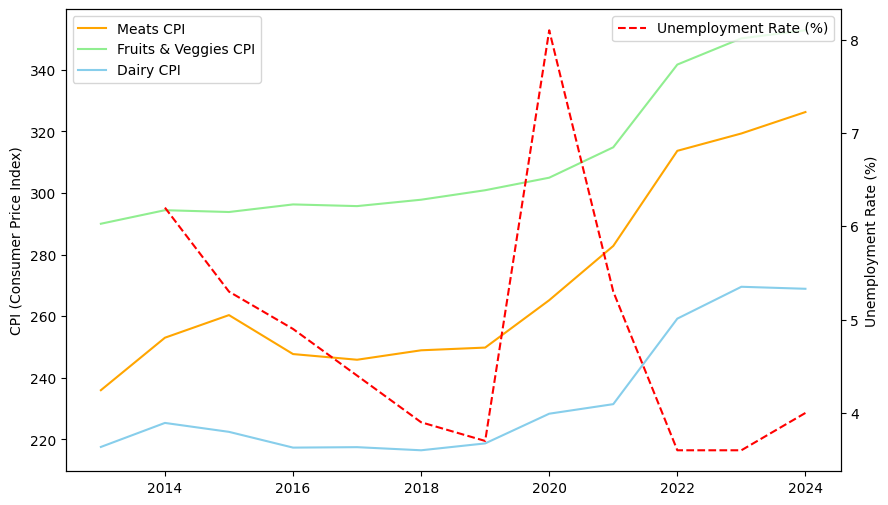

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(trends1_df["Year"], trends1_df["Meats, Poultry, Fish, and Eggs"], label="Meats CPI", color="orange")
ax1.plot(trends1_df["Year"], trends1_df["Fruits and Vegetables"], label="Fruits & Veggies CPI", color="lightgreen")
ax1.plot(trends1_df["Year"], trends1_df["Dairy and Related Product"], label="Dairy CPI", color="skyblue")
ax1.set_ylabel("CPI (Consumer Price Index)", color="black")

ax2 = ax1.twinx()  
ax2.plot(trends1_df["Year"], trends1_df["Unemployment %"], label="Unemployment Rate (%)", color="red", linestyle="dashed")
ax2.set_ylabel("Unemployment Rate (%)", color="black")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [25]:
trends2_df = pd.merge(annualfoodcpi_df, snap_df, how="left", on="Year")
filtered_trends2 = trends2_df[trends2_df["Year"] <= 2023]
filtered_trends2.head(11)

,Year,"Meats, Poultry, Fish, and Eggs",Fruits and Vegetables,Dairy and Related Product,SNAP Participants %
0,2013,235.952,289.992,217.529,13.5
1,2014,252.991,294.389,225.327,13.2
2,2015,260.331,293.801,222.428,12.8
3,2016,247.682,296.263,217.312,12.4
4,2017,245.838,295.718,217.457,11.7
5,2018,248.906,297.794,216.446,11.3
6,2019,249.785,300.873,218.677,10.7
7,2020,265.173,304.944,228.322,11.4
8,2021,282.784,314.813,231.422,12.4
9,2022,313.667,341.668,259.184,12.4


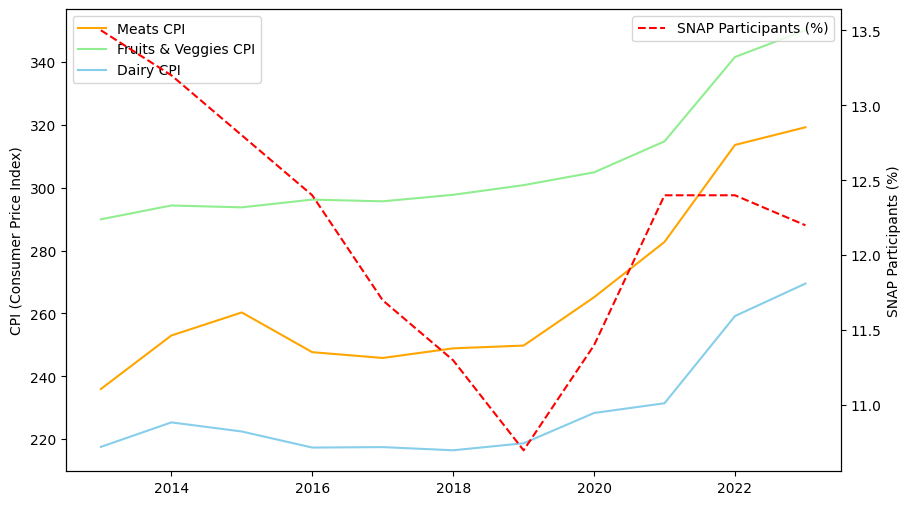

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(filtered_trends2["Year"], filtered_trends2["Meats, Poultry, Fish, and Eggs"], label="Meats CPI", color="orange")
ax1.plot(filtered_trends2["Year"], filtered_trends2["Fruits and Vegetables"], label="Fruits & Veggies CPI", color="lightgreen")
ax1.plot(filtered_trends2["Year"], filtered_trends2["Dairy and Related Product"], label="Dairy CPI", color="skyblue")
ax1.set_ylabel("CPI (Consumer Price Index)", color="black")

ax2 = ax1.twinx()  
ax2.plot(filtered_trends2["Year"], filtered_trends2["SNAP Participants %"], label="SNAP Participants (%)", color="red", linestyle="dashed")
ax2.set_ylabel("SNAP Participants (%)", color="black")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

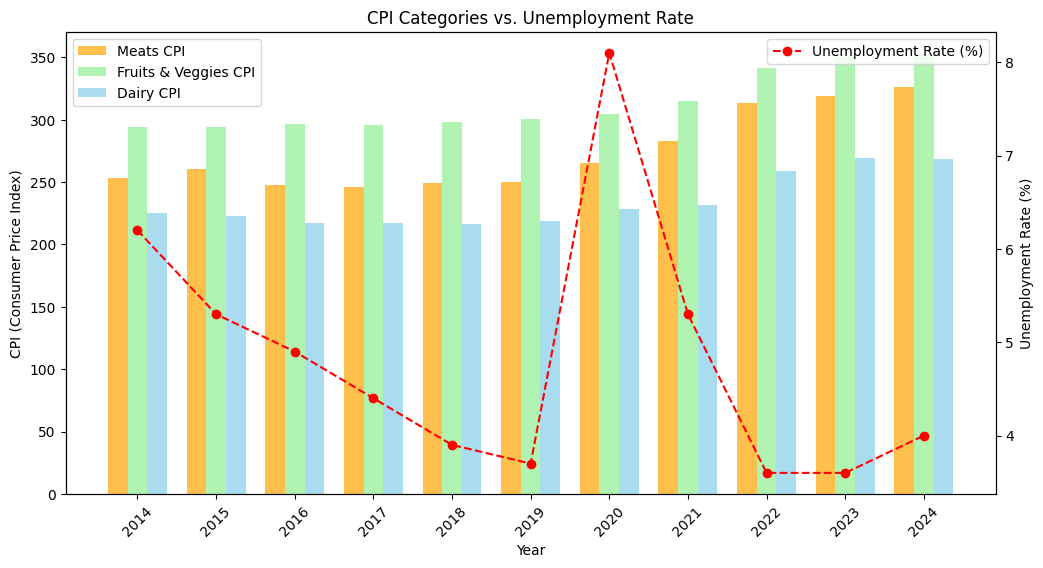

In [34]:
trends_filtered = trends1_df.dropna(subset=["Unemployment %"])

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.25
x = np.arange(len(trends_filtered["Year"]))

ax1.bar(x - bar_width, trends_filtered["Meats, Poultry, Fish, and Eggs"], 
        bar_width, label="Meats CPI", color="orange", alpha=0.7)

ax1.bar(x, trends_filtered["Fruits and Vegetables"], 
        bar_width, label="Fruits & Veggies CPI", color="lightgreen", alpha=0.7)

ax1.bar(x + bar_width, trends_filtered["Dairy and Related Product"], 
        bar_width, label="Dairy CPI", color="skyblue", alpha=0.7)

ax1.set_xlabel("Year")
ax1.set_ylabel("CPI (Consumer Price Index)")
ax1.set_title("CPI Categories vs. Unemployment Rate")
ax1.set_xticks(x)
ax1.set_xticklabels(trends_filtered["Year"], rotation=45)

ax2 = ax1.twinx()
ax2.plot(x, trends_filtered["Unemployment %"], 
         color="red", linestyle="dashed", marker="o", label="Unemployment Rate (%)")

ax2.set_ylabel("Unemployment Rate (%)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()